# Naive Implementation of 1-d and 2-d Convolutional Neural Network

# Classifying images with Deep Convolutional Neural Networks
<li> Convolution operations in one and two dimensions</li>
<li> The building blocks of CNN architectures</li>
<li> Implementing deep CNNs in PyTorch</li>
<li> Data augmentation techniques for improving the generalization performance</li>
<li>Implementing a facial CNN classifier for recognizing if someone is smiling or not</li><br><br>
-------------------------------------------------------------------------------
<li>CNNs are considered as feature extractors</li>
<li>The early layers extract low level features while the later layers use these features to predict a target value or class label</li>
<li>Local Receptive Field</li>
<li>Sparse Connectivity: A single element in the feature map is connected to only a small patch of pixels.</li>
<li>Parameter Sharing: Using same weights for differen patches of the input image.</li>
<li>CNN composition: Convolutional layers + Subsampling layers + Fully connected layers</li>
<li>Subsampling layers: Pooling layers is another name of subsampling layers. These layer do not have any **learnable parameters**</li>
<li>Convolutional layers and fully connected layers have learnable parameteres(weights and biases) that are optimized during training</li><br>
--------------------------------------------------------------------------------
<li>Padding: to control the output dimensions</li>
<li>Three types of padding: Full, Same, Valid</li>
<li>Full: Increases the number of dimensions of the output</li>
<li>Same: The number of dimensions remain same as the input</li>
<li>Valid: No padding. The output is smaller than the input. Loss of information</li>
<li>In practice, one should preserve the spatial size using same padding for the convolutional layers and decrease the spatial size via the pooling or convolutional layers with stride 2 instead</li>
<br>
--------------------------------------------------------------------------------
<li>Determining the size of the convolution output</li>
<li>o(output) = floor((n+2p-m)/s) + 1</li>
<li>n = input size; p = padding; m = filter or kernel size; s = stride</li>


#### Computing convolutions in one-dimension

In [2]:
import numpy as np
def conv1d(x, w, p=0, s=1):
  w_rot = np.array(w[::-1])#to perform rotation
  x_padded = np.array(x)#input array
  if p>0:
    zero_pad = np.zeros(shape=p)#adding padding of shape p
    x_padded = np.concatenate([zero_pad, x_padded, zero_pad])
    res = []#result
    for i in range(0, int((len(x_padded) - len(w_rot))) +1, s):#s is stride
      res.append(np.sum(x_padded[i:i+w_rot.shape[0]] * w_rot))
    return np.array(res)

##Testing
x = [1, 3, 2, 4, 5, 6,1, 3]
w = [1, 0, 3, 1, 2]
print('Convolution 1-d implementation:', conv1d(x, w, p=2, s=1))
print('Numpy Results: ', np.convolve(x, w, mode = 'same'))

Convolution 1-d implementation: [ 5. 14. 16. 26. 24. 34. 19. 22.]
Numpy Results:  [ 5 14 16 26 24 34 19 22]


### Computing Convolution in 2d
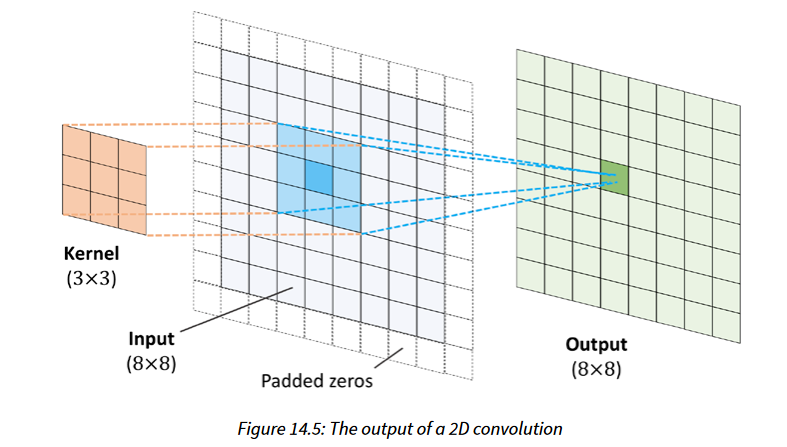

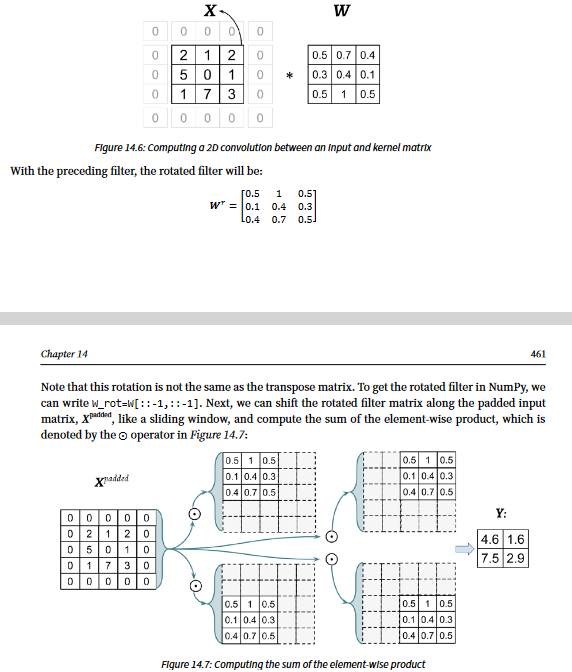

In [2]:
import numpy as np
import scipy.signal#This package provides a way to compute 2D convolution via the scipy.signal.convolve2d function
def conv2d(X, W, p=(0,0), s=(1,1)):
  W_rot = np.array(W)[::-1, ::-1]
  X_orig = np.array(X)
  n1 = X_orig.shape[0] +2*p[0]
  n2 = X_orig.shape[1] +2*p[1]
  X_padded = np.zeros(shape=(n1, n2))
  X_padded[p[0]:p[0]+X_orig.shape[0],
           p[1]:p[1]+X_orig.shape[1]] = X_orig

  res = []
  for i in range(0, int((X_padded.shape[0] - W_rot.shape[0])/s[0])+1, s[0]):
    res.append([])
    for j in range(0, int((X_padded.shape[1] - W_rot.shape[1])/s[1])+1, s[1]):
      X_sub = X_padded[i:i+W_rot.shape[0],
                     j:j+W_rot.shape[1]]
      res[-1].append(np.sum(X_sub * W_rot))

  return(np.array(res))

X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3,2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

print('Convolution 2D Implementation: \n', conv2d(X, W, p=(1,1), s=(1,1)))

print('Scipy Results:\n', scipy.signal.convolve2d(X,W, mode='same'))

Convolution 2D Implementation: 
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]
Scipy Results:
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]
